# Coding Challenge 2

1. Calculate Boeing´s Investment Multiple

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [7]:
close = pd.read_csv("../../Assets/Data-Files/close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,127.3800,386.9440,1.2691,1210.5000,46.3600,17042.9004
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [8]:
# focusing on a single instrument, in this case the Boeing (BA) stock
ba = close.BA.dropna().to_frame().copy()
ba

,BA
Date,
2014-09-30,127.3800
2014-10-01,124.6700
2014-10-02,124.1700
2014-10-03,126.3600
2014-10-06,126.2600
...,...
2021-05-24,237.4400
2021-05-25,240.7400
2021-05-26,241.3700


In [9]:
# change column header
ba.rename(columns = {"BA":"Price"}, inplace = True)
ba

,Price
Date,
2014-09-30,127.3800
2014-10-01,124.6700
2014-10-02,124.1700
2014-10-03,126.3600
2014-10-06,126.2600
...,...
2021-05-24,237.4400
2021-05-25,240.7400
2021-05-26,241.3700


In [12]:
# use build in Python method to calculate the percentage change
ba["Returns"] = ba.Price.pct_change(periods = 1) # alternative 2
ba

,Price,Returns
Date,,
2014-09-30,127.3800,NaN
2014-10-01,124.6700,-0.0213
2014-10-02,124.1700,-0.0040
2014-10-03,126.3600,0.0176
2014-10-06,126.2600,-0.0008
...,...,...
2021-05-24,237.4400,0.0112
2021-05-25,240.7400,0.0139
2021-05-26,241.3700,0.0026


In [13]:
ba.to_csv("../../Assets/Data-Files/ba.csv")

In [14]:
# using the Boing data file for further analysis
ba = pd.read_csv("../../Assets/Data-Files/ba.csv", index_col = "Date", parse_dates = ["Date"])
ba

,Price,Returns
Date,,
2014-09-30,127.3800,NaN
2014-10-01,124.6700,-0.0213
2014-10-02,124.1700,-0.0040
2014-10-03,126.3600,0.0176
2014-10-06,126.2600,-0.0008
...,...,...
2021-05-24,237.4400,0.0112
2021-05-25,240.7400,0.0139
2021-05-26,241.3700,0.0026


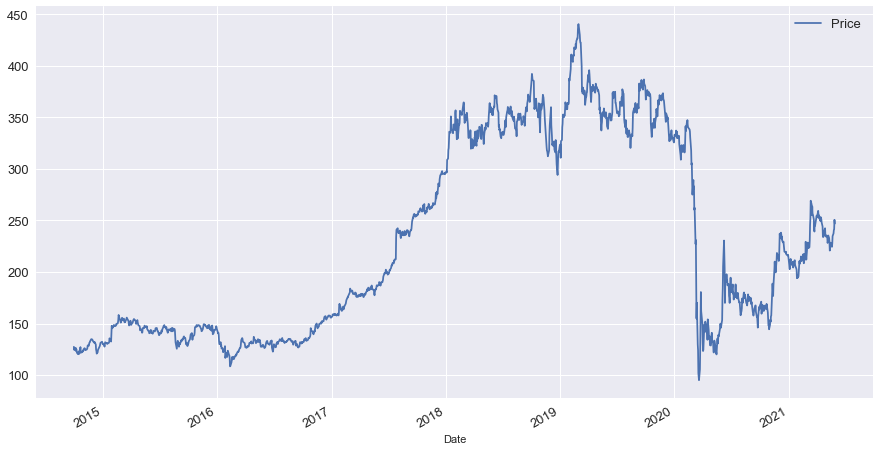

In [15]:
ba.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [16]:
ba.describe() # 50th% percentile is the median

,Price,Returns
count,1678.0000,1677.0000
mean,228.6776,0.0007
std,94.3785,0.0263
min,95.0100,-0.2385
25%,143.3175,-0.0092
50%,189.0150,0.0007
75%,335.0775,0.0105
max,440.6200,0.2432


In [17]:
# artithmetic mean is a popular performance metric for reward
mu = ba.Returns.mean() # arithmetic mean return == Reward
mu

0.0007405546198028601

In [18]:
# the standard deviation of returns is a popular performance metric for risk/volatility
sigma = ba.Returns.std() # standard deviation of returns == Risk/Volatility
sigma

0.02627539199727626

In [20]:
# sidenote: standard deviation is the square root of the variance
np.sqrt(ba.Returns.var())

0.02627539199727626

## Challenge (1) - Calculate Boeing´s Investment Multiple

**Investment Multiple:** Ending Value of 1 (Dollar, Euro, etc.) invested.  
Multiple = Ending Value / Initial Value

In [22]:
# last price of a given period divided by the first price returns the multiple
multiple = (ba.Price[-1] / ba.Price[0])
multiple # result is the ending value of one dollar invested

1.9392370042293487

In [23]:
# calculate the increase in percent
(multiple - 1) * 100 # the invested dollar gets subtracted from the multiple

93.92370042293487

## Challenge (2) - Calculate Boeing´s CAGR

**Compound Annual Growth Rate (CAGR):** The (constant annual) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment's lifespan (Wikipedia).

In [26]:
start = ba.index[0]
start

Timestamp('2014-09-30 00:00:00')

In [27]:
end = ba.index[-1]
end

Timestamp('2021-05-28 00:00:00')

In [28]:
# timestamp objects can be subtracted
td = end - start
td # returns a timedelta object

Timedelta('2432 days 00:00:00')

In [29]:
# timedelta divided by average number of years = 365.25
td_years = td.days / 365.25
td_years

6.658453114305271

In [30]:
# Compound Annual Growth Rate is the multiple to the power of one devided by the annual timedelta
# and then subtracted by one
cagr = multiple**(1 / td_years) - 1 #short version
cagr

0.10458172746091354

In [32]:
# more complex calculation with pandas data frame
# (msft.Price[-1]/msft.Price[0]) calculates the multiple
# then the timedelta divided by average number of years = 365.25 minus 1 is calculated
cagr = (ba.Price[-1]/ba.Price[0])**(1/((ba.index[-1] - ba.index[0]).days / 365.25)) - 1 
cagr

0.10458172746091354

In [33]:
# inverse calculation, calculating multiple with cagr
(1 + cagr)**(td_years) # alternative 2 to calculate multiple

1.9392370042293487

## Challenge (3) - Calculate Boeing´s Geometric Mean Return

**Geometric Mean has similar definition as the Compound Annual Growth Rate:** The (constant daily) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each day of the investment's lifespan (Wikipedia).

In [34]:
# 3rd alternative to calculate multiple (compounding daily returns)
# prod() method multiplies all elements
multiple = (1 + ba.Returns).prod()
multiple

1.939237004229414

In [36]:
# number of elements in return column
n = ba.Returns.count()
n

1677

In [37]:
# geometric mean return
geo_mean = multiple**(1/n) - 1
geo_mean

0.00039500619889754063

In [38]:
# alternative #4 to calculate multiple (geometric mean)
(1 + geo_mean)**n

1.9392370042296294

## Challenge (4) - Calculate Boeing´s Investment Multiple with compound daily returns

In [39]:
# 3rd alternative to calculate multiple (compounding daily returns)
# prod() method multiplies all elements
multiple = (1 + ba.Returns).prod()
multiple

1.939237004229414